In [1]:
#installations
!pip install moviepy
!pip install -q py-feat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.1/628.1 KB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.1 MB/s eta 0:00:00


In [2]:
#imports
import pandas
from moviepy.editor import *
from feat import Detector

In [ ]:
def prepare_clip(file_name, path, new_path,t):
  orig_file =  os.path.join(path, file_name)
  write_file = os.path.join(new_path, file_name)
  clip = VideoFileClip(orig_file)
  duration = clip.duration
  if duration > t+5 and t-5 >=0:
    start = t-5
    end = t+5
    clip = clip.subclip(start, end)
    clip.write_videofile(write_file)

In [ ]:
#takes in a video file and returns all the facial features detected for each face detected within a frame 
def extract_features_video(detector, video_file, frame_num):
  df = detector.detect_video(video_file, skip_frames= frame_num)
  return df 

#takes in a frame and returns all the facial features detected for each face detected 
def extract_features_byframe(detector, frame_path):
  df = detector.detect_image(frame_path)
  return df 




In [ ]:
#create clip 
#test video: M01003JUG timestamp:	253.0000
prepare_clip('M01003JUG.mp4','/content/drive/MyDrive/ccu_videos/videos/video', '/content/drive/MyDrive/ccu_videos/videos/test',253.0000)

In [ ]:
#test time series feature extraction for one video 
detector = Detector() #pass into the functions
fex = extract_features_video(detector, '/content/drive/MyDrive/ccu_videos/videos/test/M01003JUG.mp4', 24)

In [13]:
fex.to_csv('/content/drive/MyDrive/ccu_videos/videos/test/test_features.csv')

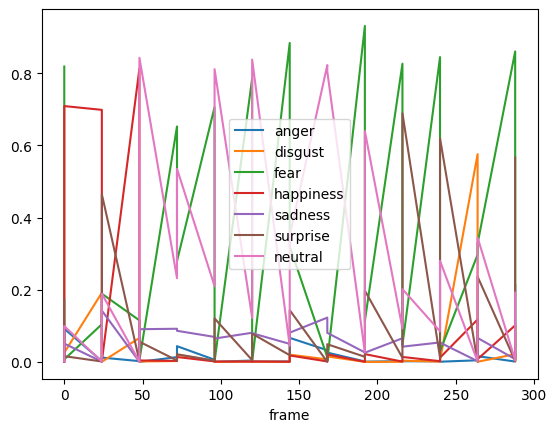

In [14]:
axes = fex.emotions.plot()

In [18]:
#plot for different features
#face coordinates 
facial_corrds = fex.faceboxes

#facial msuculature movement detected in each face at each frame
musc = fex.aus

#emotions detected in each face at each frame
emot = fex.emotions

#face pose 
fac_pose = fex.poses

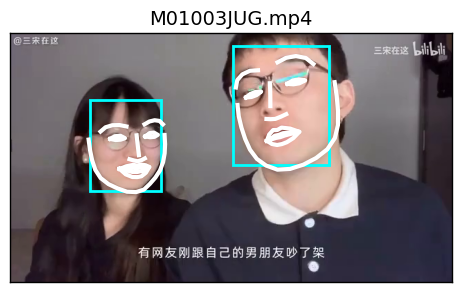

In [34]:
df_0 = fex.iloc[2:4]
figs = df_0.plot_detections(faces='landmarks', faceboxes=True, muscles=False, poses=False, gazes=True, add_titles=True, au_barplot=False, emotion_barplot=False, plot_original_image=True)

In [35]:
fex.info

<class 'feat.data.Fex'>
au_columns: ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43']
emotion_columns: ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']
facebox_columns: ['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight', 'FaceScore']
landmark_columns: ['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y

In [9]:
#load saved test_features
from feat.utils.io import read_feat

fex = read_feat('/content/drive/MyDrive/ccu_videos/videos/test/test_features.csv')
fex = fex.drop(['input', 'frame.1'], axis = 1)

In [26]:
frames = fex['frame'].unique()

In [28]:
import numpy as np
def calc_sim(df, frames, features):
  frames_sim = {}
  for frame in frames:
    temp = df.loc[df['frame'] == frame]
    temp = temp[features]
    #calc similarity between frames
    sim = np.dot(temp.iloc[0], temp.iloc[1])/(np.linalg.norm(temp.iloc[0])*np.linalg.norm(temp.iloc[1]))
    frames_sim[frame] = sim
  return frames_sim 

In [23]:
features = list(set(fex.columns) - set(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight','FaceScore', 'label', 'input', 'frame']))

In [37]:
emotions_features = fex.emotions.columns
musc_features = fex.aus.columns

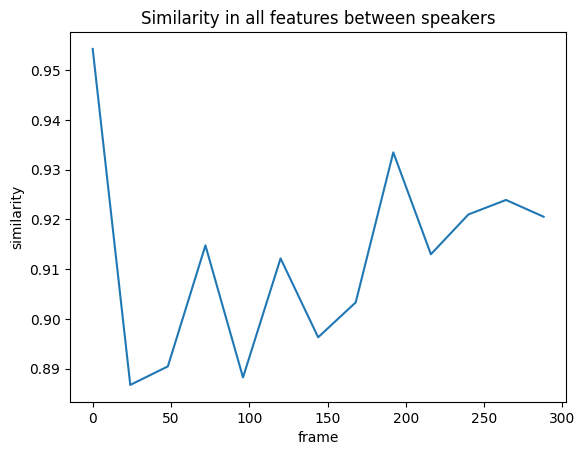

In [46]:
import matplotlib.pylab as plt
sims = calc_sim(fex, frames, features)
sims_list = sims.items()
x, y = zip(*sims_list) 

plt.plot(x, y)
plt.xlabel('frame')
plt.ylabel('similarity')
plt.title('Similarity in all features between speakers')
plt.show()

In [48]:
sim_emotions = calc_sim(fex, frames, emotions_features)

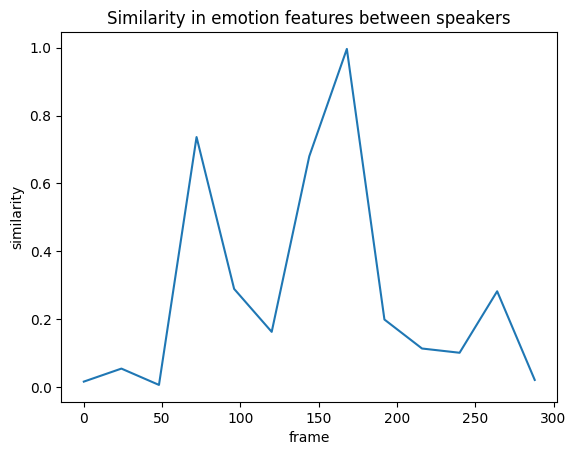

In [50]:
sims_list = sim_emotions.items()
x, y = zip(*sims_list) 

plt.plot(x, y)
plt.xlabel('frame')
plt.ylabel('similarity')
plt.title('Similarity in emotion features between speakers')
plt.show()

In [51]:
sim_musc = calc_sim(fex, frames, musc_features)

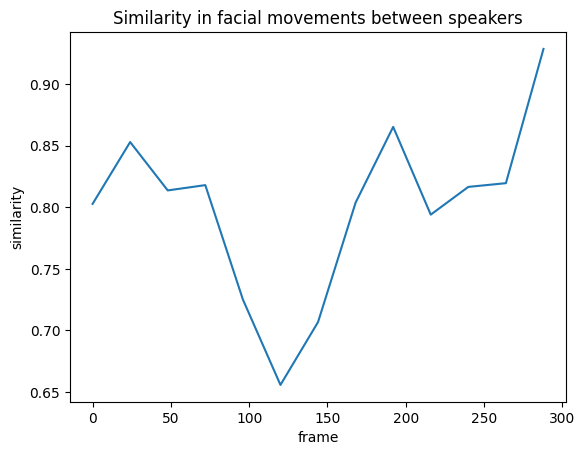

In [52]:
sims_list = sim_musc.items()
x, y = zip(*sims_list) 

plt.plot(x, y)
plt.xlabel('frame')
plt.ylabel('similarity')
plt.title('Similarity in facial movements between speakers')
plt.show()

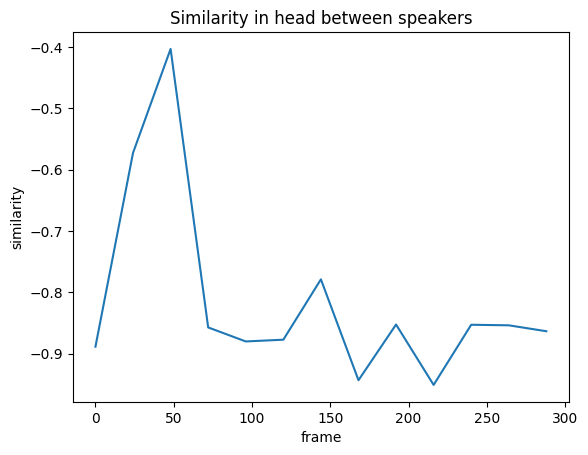

In [56]:
sim_pose = calc_sim(fex, frames, fex.poses.columns)
sims_list = sim_pose.items()
x, y = zip(*sims_list) 

plt.plot(x, y)
plt.xlabel('frame')
plt.ylabel('similarity')
plt.title('Similarity in head between speakers')
plt.show()